<a href="https://colab.research.google.com/github/YogoBog/MagshimimAIFinalProject/blob/main/redshift_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### In this project we want to find the distance of a space obj(galaxy, star, QSO) from Earth at the moment the data of the obj was taken.
### Than we want to see if there is a correlation between any of the features to the distance.

In [1]:
### https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
### this is the dataset used

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv("/content/drive/MyDrive/star_classification.csv")
df

Mounted at /content/drive


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660000000000000.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543780000000000000.00,GALAXY,0.63,5812,56354,171
1,1237660000000000000.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760100000000000000.00,GALAXY,0.78,10445,58158,427
2,1237660000000000000.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200000000000000.00,GALAXY,0.64,4576,55592,299
3,1237660000000000000.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301100000000000000.00,GALAXY,0.93,9149,58039,775
4,1237680000000000000.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891860000000000000.00,GALAXY,0.12,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237680000000000000.00,39.62,-2.59,22.17,22.98,21.90,21.31,20.74,7778,301,2,581,10554300000000000000.00,GALAXY,0.00,9374,57749,438
99996,1237680000000000000.00,29.49,19.80,22.69,22.39,20.45,19.76,19.42,7917,301,1,289,8586350000000000000.00,GALAXY,0.40,7626,56934,866
99997,1237670000000000000.00,224.59,15.70,21.17,19.27,18.20,17.69,17.35,5314,301,4,308,3112010000000000000.00,GALAXY,0.14,2764,54535,74
99998,1237660000000000000.00,212.27,46.66,25.35,21.64,19.91,19.07,18.62,3650,301,4,131,7601080000000000000.00,GALAXY,0.46,6751,56368,470


In [ ]:
df['u Magnitude'] = -2.5 * np.log10(df['u'])
df['g Magnitude'] = -2.5 * np.log10(df['g'])
df['r Magnitude'] = -2.5 * np.log10(df['r'])
df['i Magnitude'] = -2.5 * np.log10(df['i'])
df['z Magnitude'] = -2.5 * np.log10(df['z'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


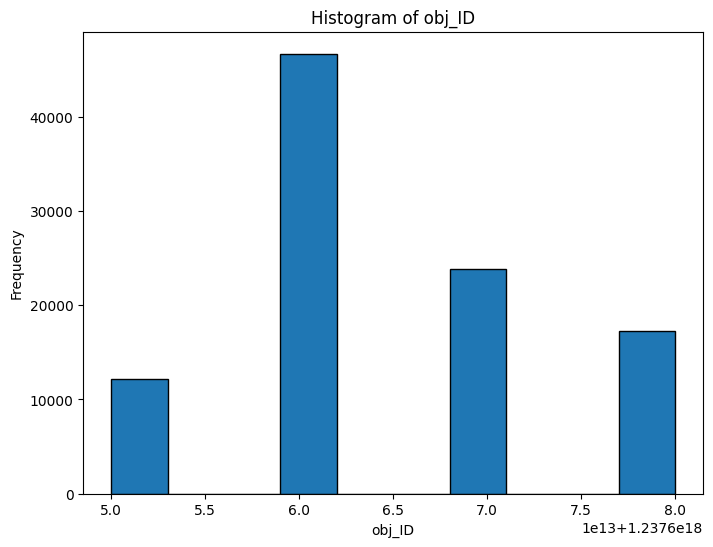

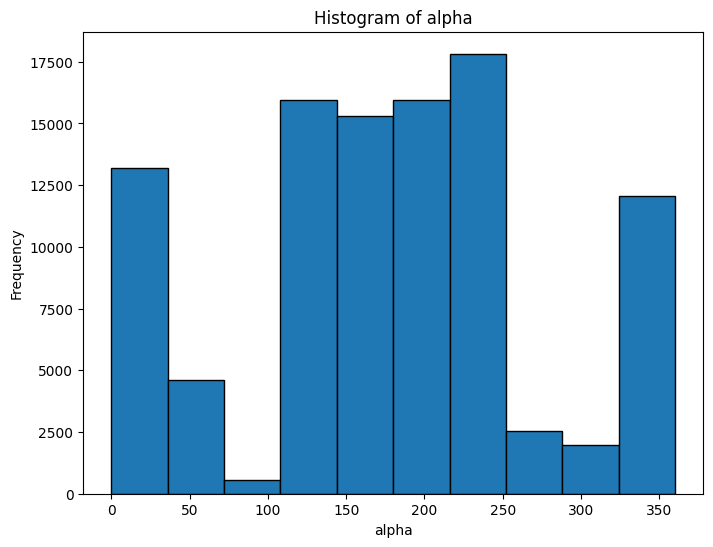

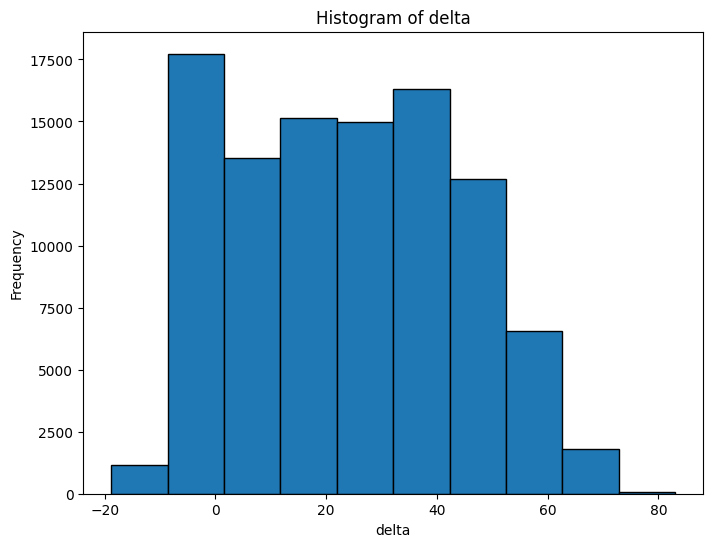

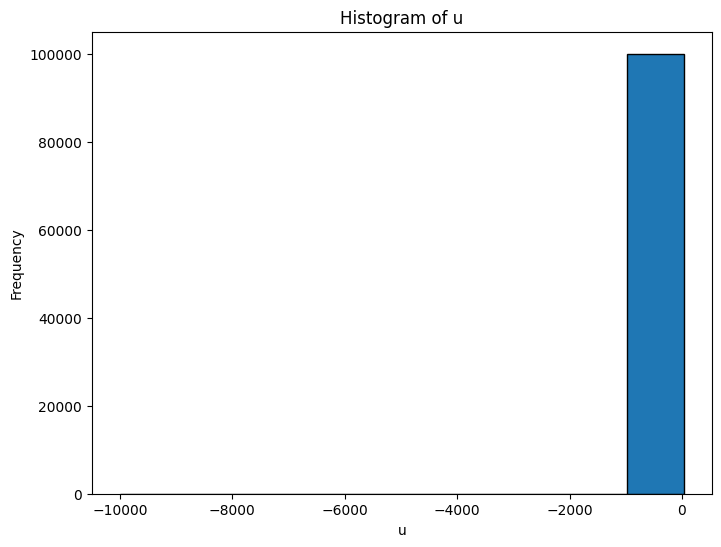

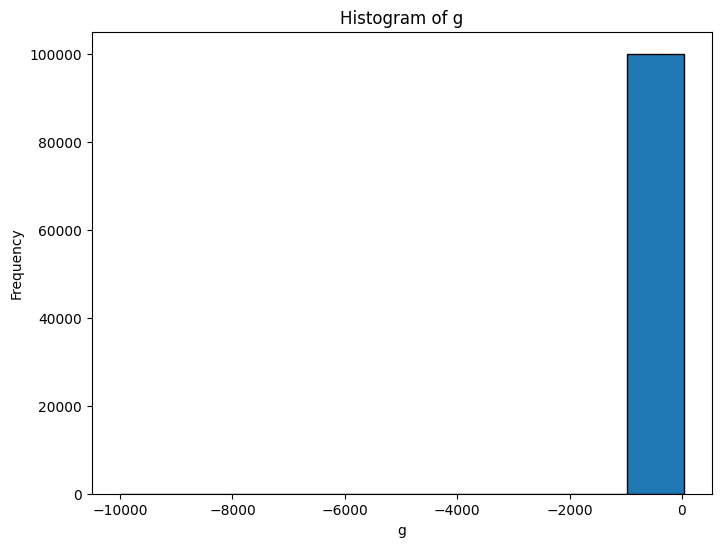

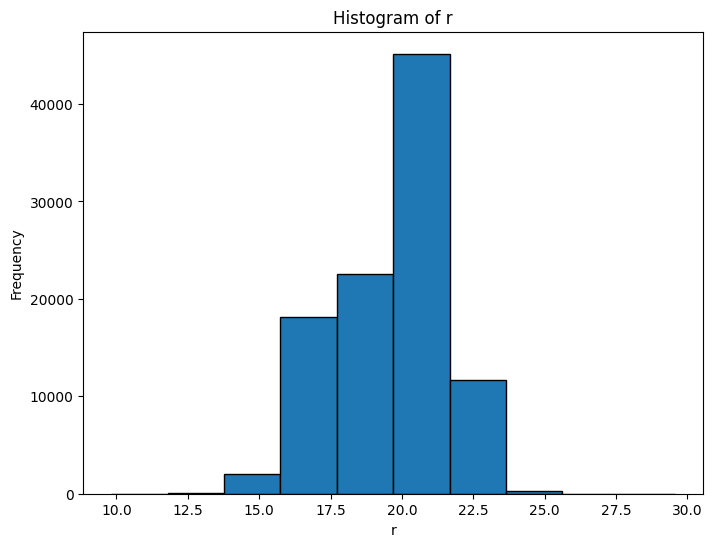

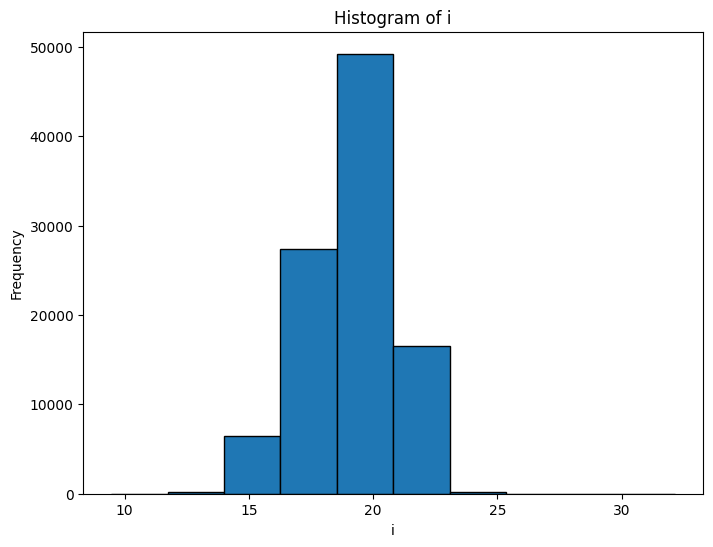

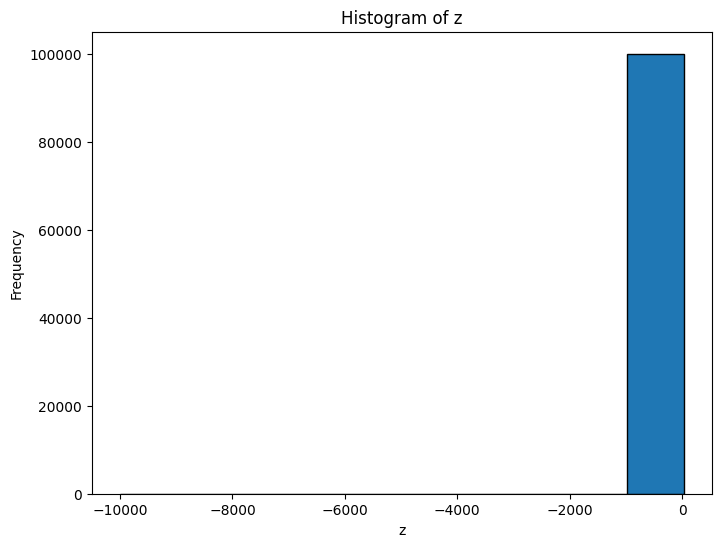

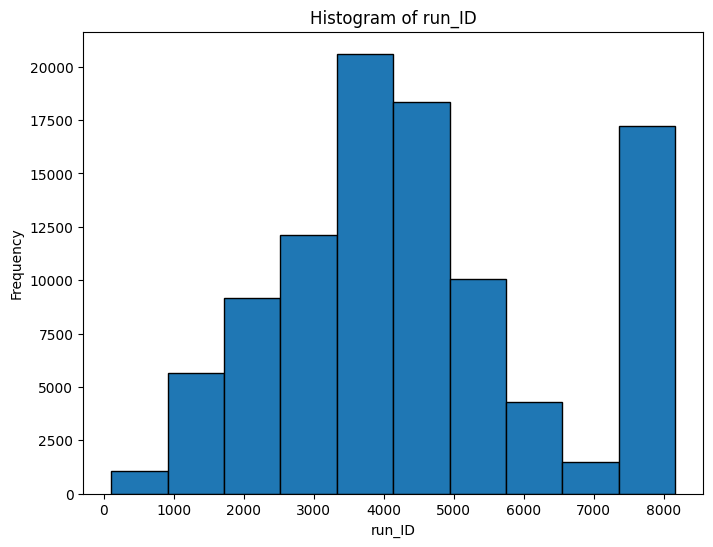

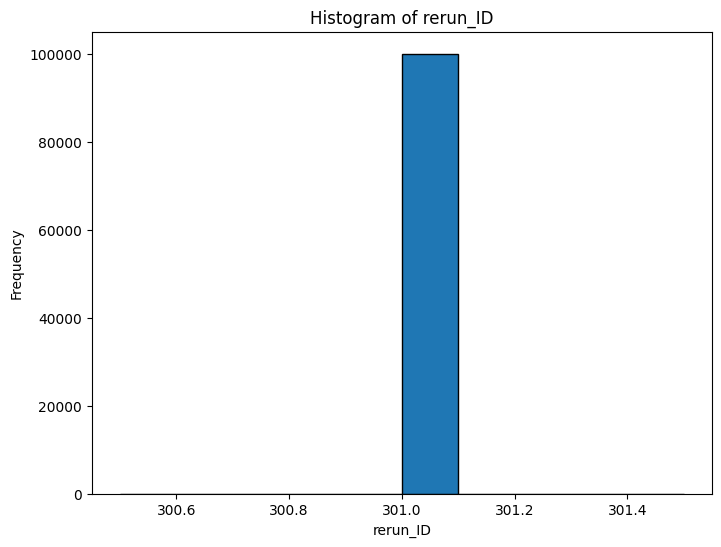

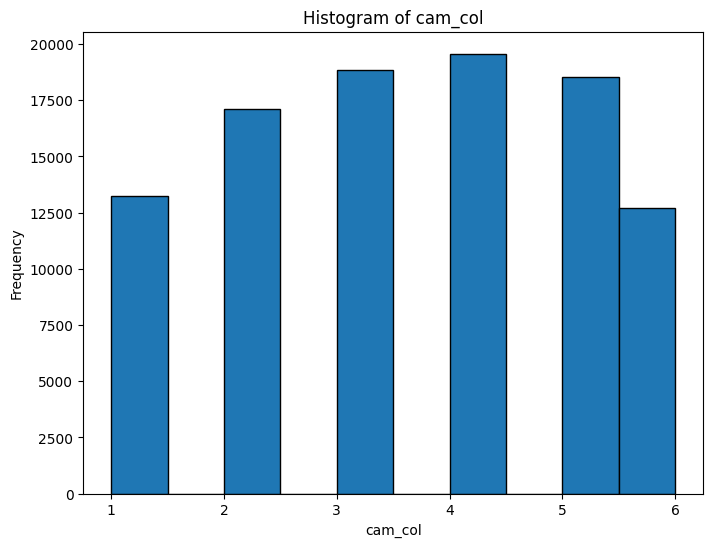

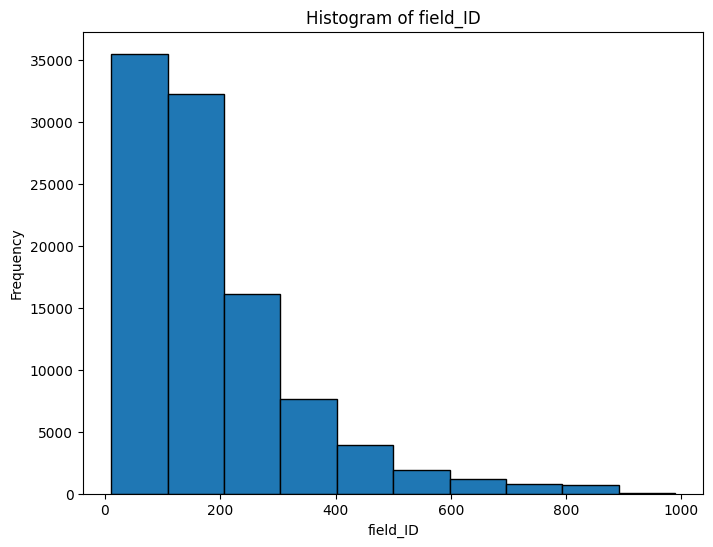

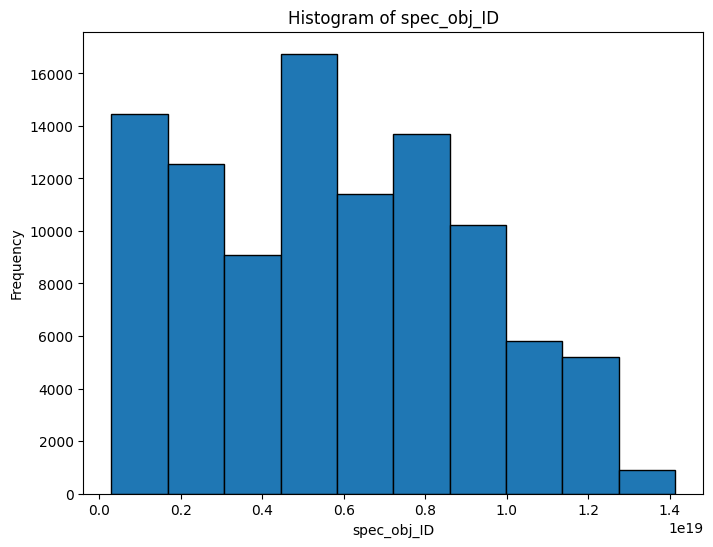

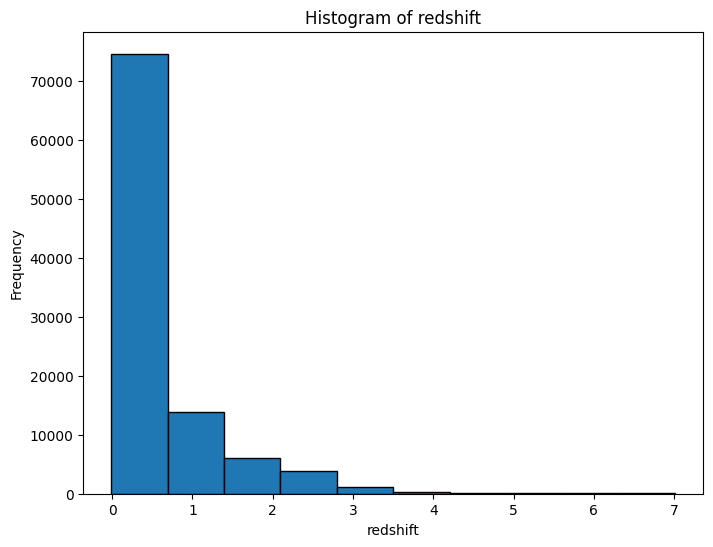

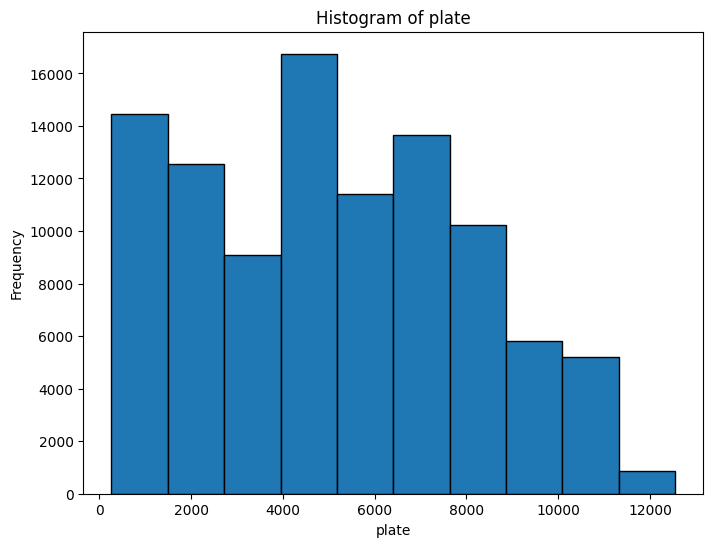

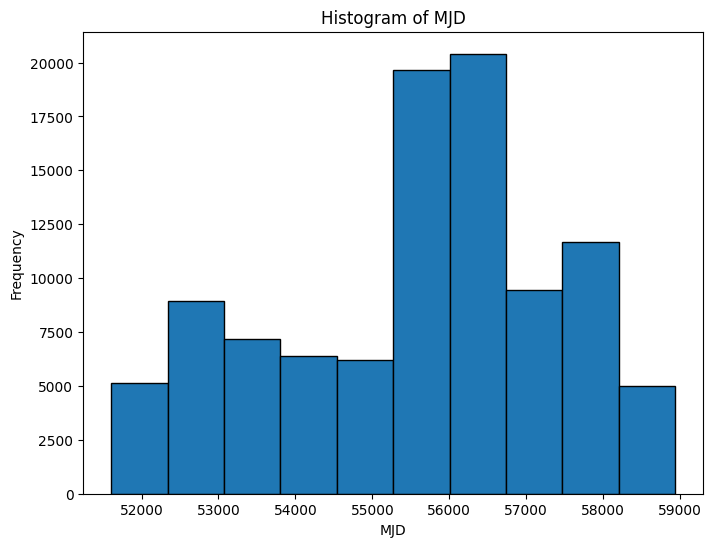

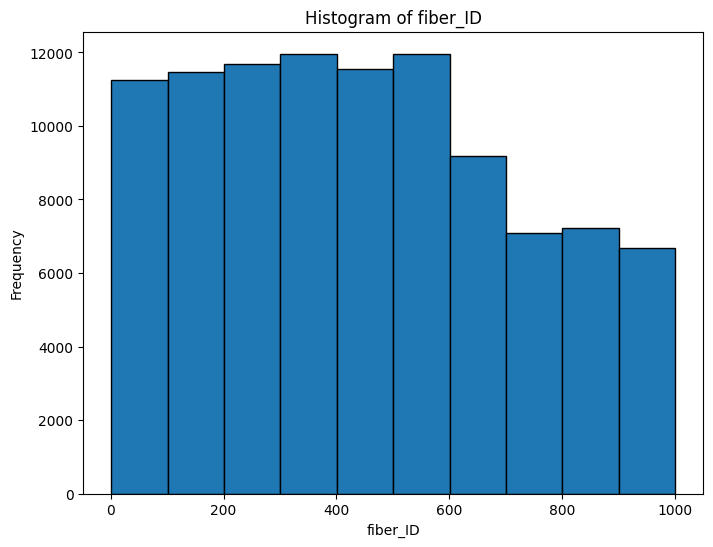

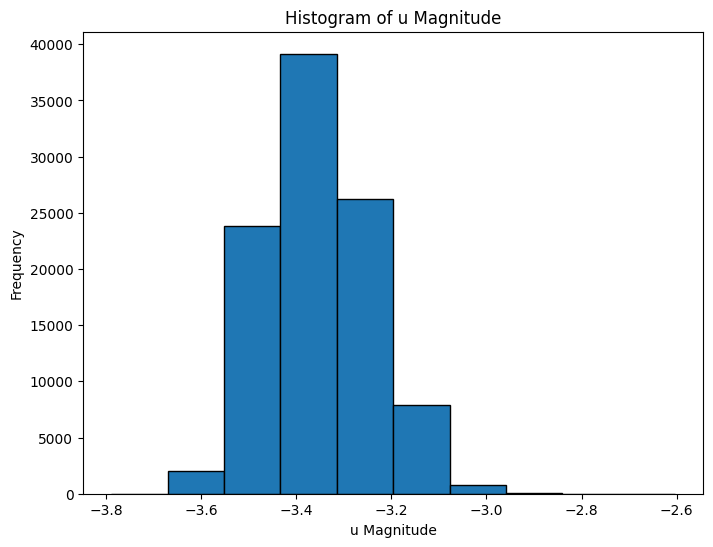

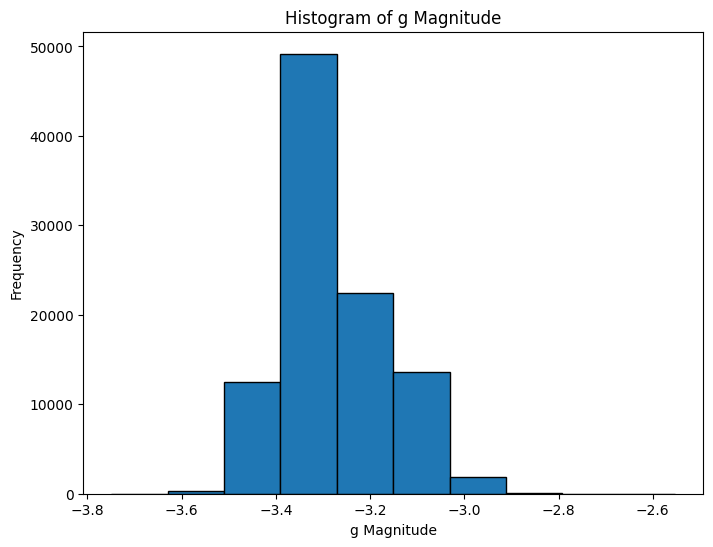

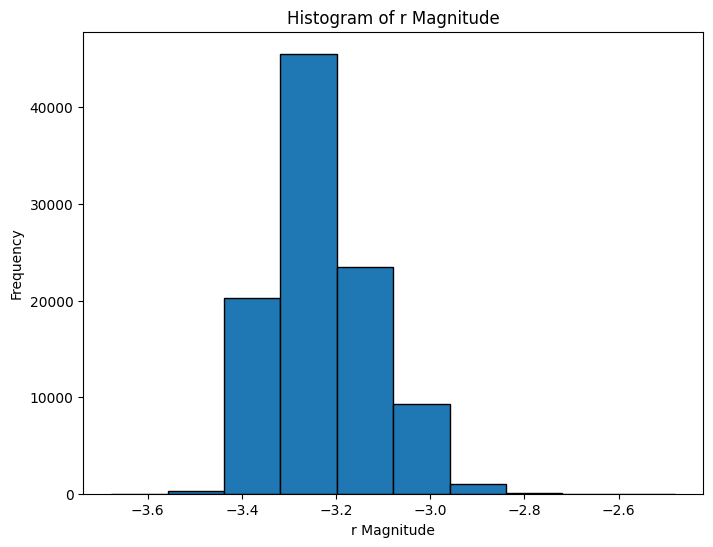

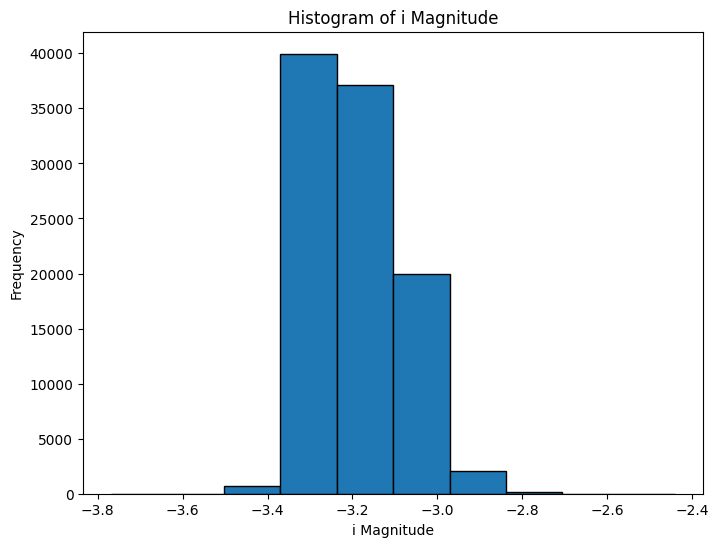

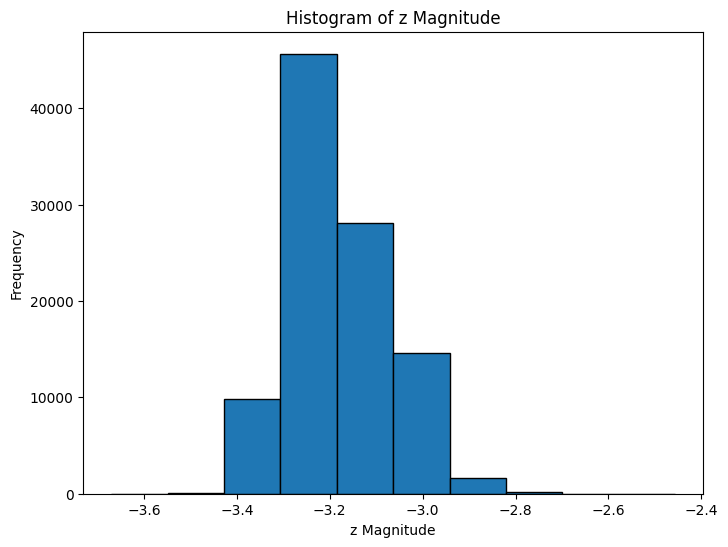

In [ ]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

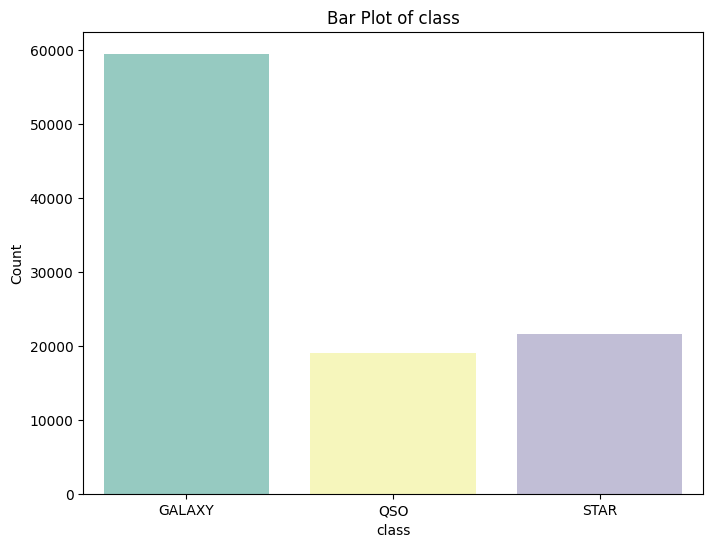

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
from sklearn.utils import resample

class_distribution = df['class'].value_counts()
print(class_distribution)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


In [ ]:
# Separate the data into different classes
stars = df[df['class'] == 'STAR']
galaxies = df[df['class'] == 'GALAXY']
qsr = df[df['class'] == 'QSO']

# Upsample the minority classes to match the number of galaxies
stars_upsampled = resample(stars, replace=True, n_samples=len(galaxies), random_state=42)
qsr_upsampled = resample(qsr, replace=True, n_samples=len(galaxies), random_state=42)

# Combine the upsampled data with the original galaxies data
df_balanced = pd.concat([galaxies, stars_upsampled, qsr_upsampled])


In [ ]:
# Downsample the majority class to match the number of the minority classes
galaxies_downsampled = resample(galaxies, replace=False, n_samples=len(stars), random_state=42)

# Combine the downsampled data with the original stars and QSR data
df_balanced = pd.concat([stars, qsr, galaxies_downsampled])


In [ ]:
class_distribution = df_balanced['class'].value_counts()
print(class_distribution)

STAR      21594
GALAXY    21594
QSO       18961
Name: class, dtype: int64


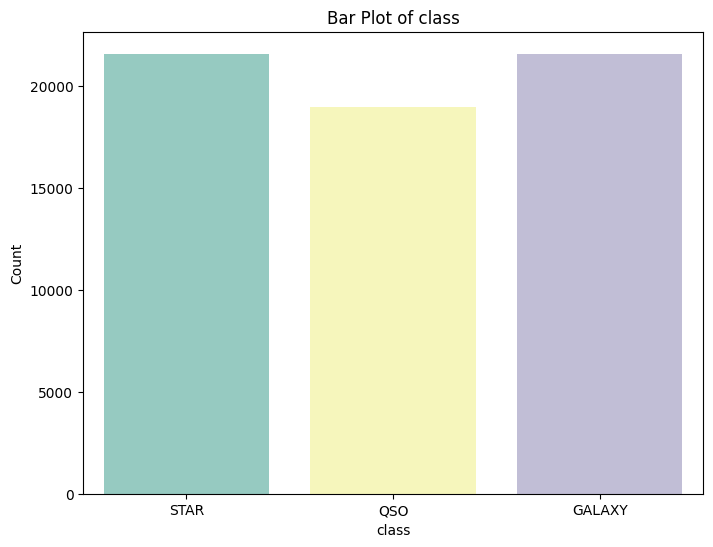

In [ ]:
categorical_cols = df_balanced.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_balanced, x=col, palette='Set3')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
duplicates = df_balanced.duplicated()

In [ ]:
num_duplicates = duplicates.sum()
num_duplicates

0

In [ ]:
df_balanced.shape # Show size of the dataset

(62149, 23)

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df_balanced.isnull().sum()

# Display columns with missing values (if any)
missing_values = missing_values[missing_values > 0]
print(missing_values)


u Magnitude    1
g Magnitude    1
z Magnitude    1
dtype: int64


In [ ]:
# Drop rows with missing values
df_balanced = df_balanced.dropna()

# Verify that there are no more missing values
print(df_balanced.isnull().sum())


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
u Magnitude    0
g Magnitude    0
r Magnitude    0
i Magnitude    0
z Magnitude    0
dtype: int64


In [ ]:
pd.value_counts(df_balanced.dtypes) # Count each data types in the dataset

float64    15
int64       7
object      1
dtype: int64

In [ ]:
df['class'] # Display non-numerical feature

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: object

In [ ]:
# Display unique values of class
class_unique_values = df['class'].unique()
print(class_unique_values)

['GALAXY' 'QSO' 'STAR']


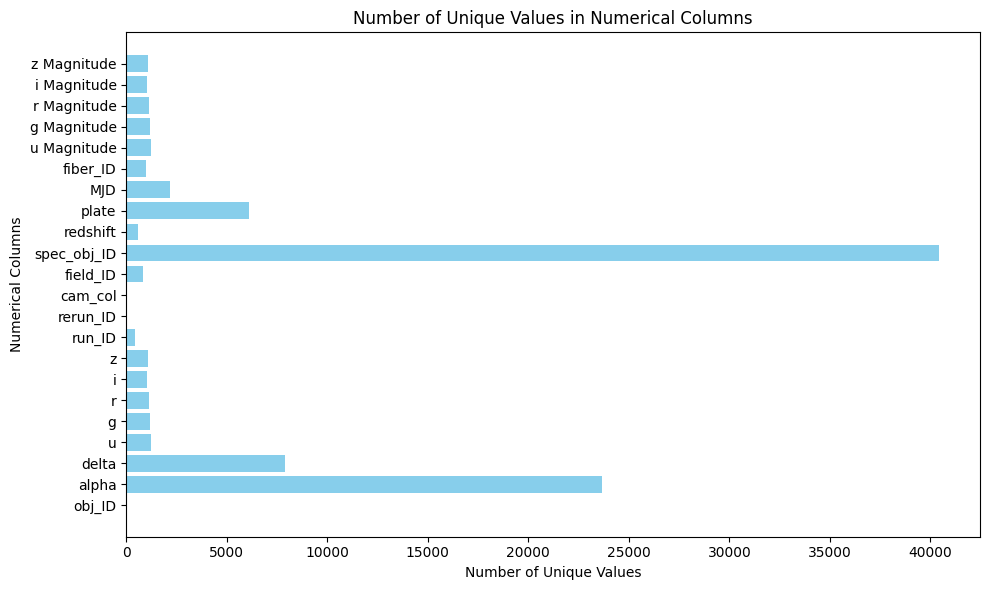

In [ ]:
# For each numerical feature show number of unique values
numerical_columns = df_balanced.select_dtypes(include='number')

unique_value_counts = numerical_columns.nunique()

plt.figure(figsize=(10, 6))
plt.barh(unique_value_counts.index, unique_value_counts.values, color='skyblue')  # Horizontal bar plot
plt.ylabel('Numerical Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values in Numerical Columns')
plt.tight_layout()

plt.show()

<Axes: >

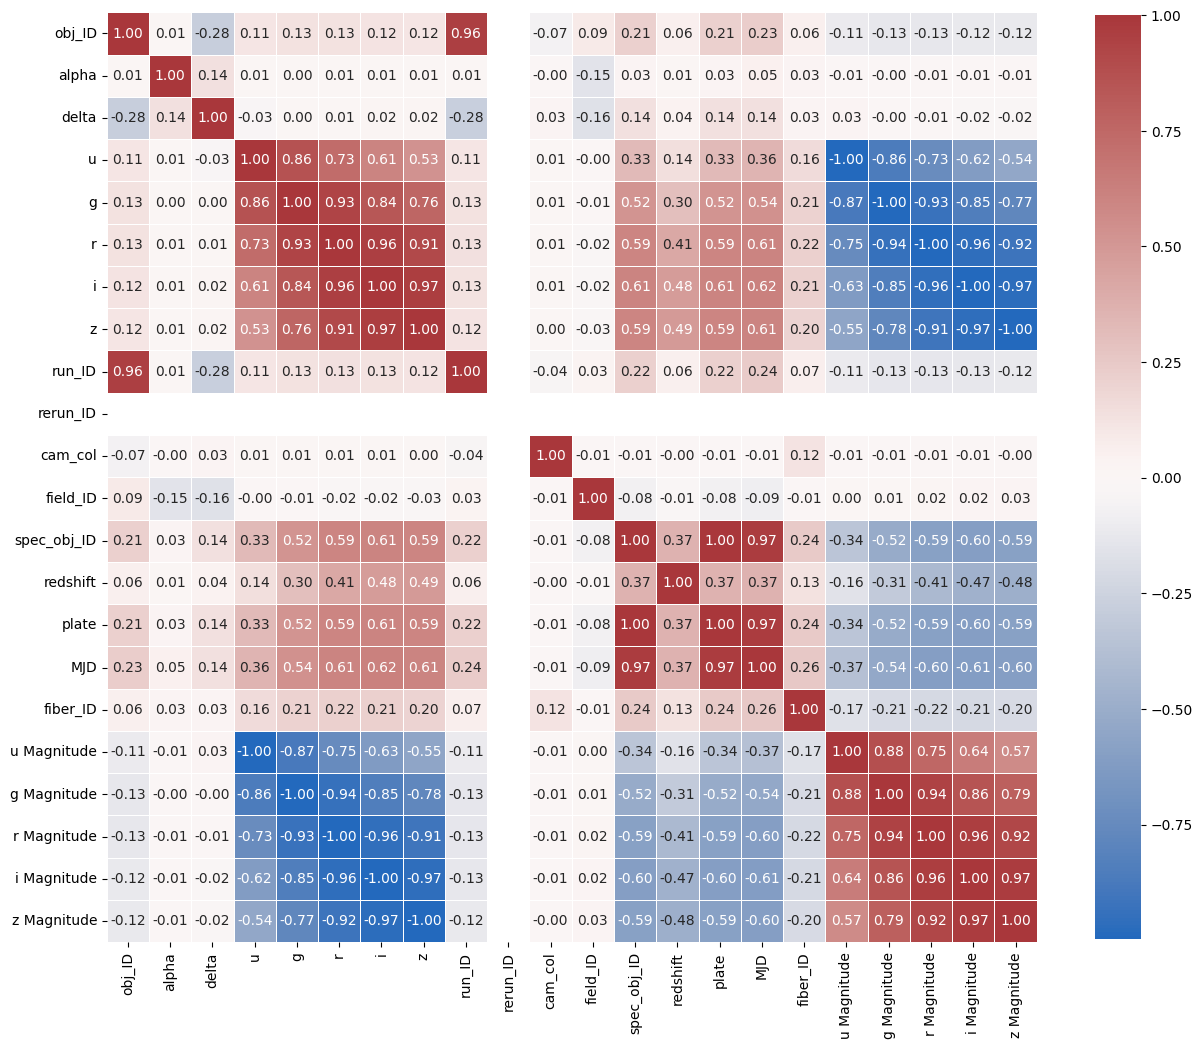

In [ ]:
df_corr = df_balanced.select_dtypes(include='number').corr()

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, square=True, annot=True, fmt=".2f",
            center=0, linewidths=.5, cmap="vlag", cbar_kws={"shrink": 0.8})

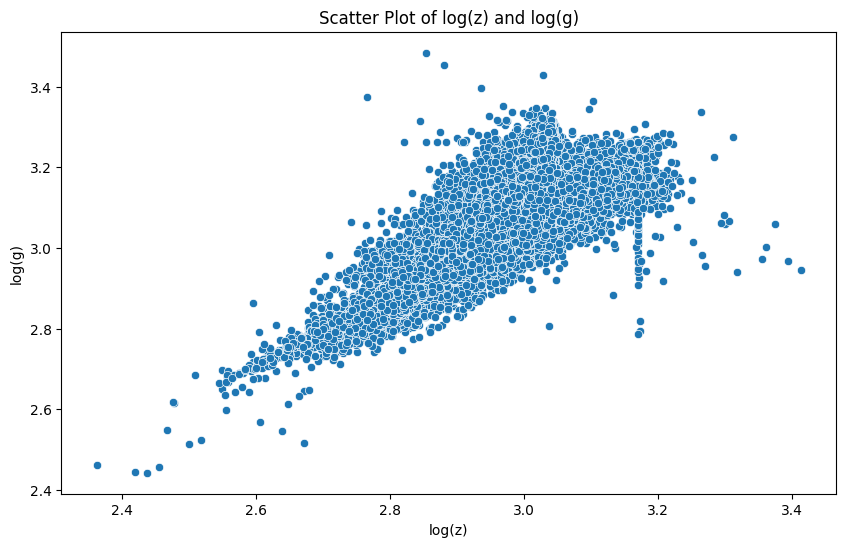

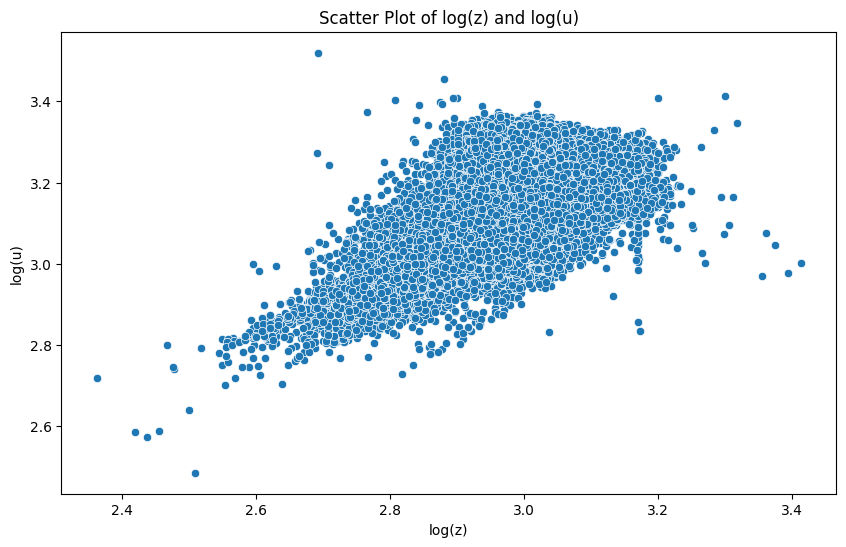

In [ ]:
df_log = df[['z', 'g', 'u']].apply(np.log1p)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='z', y='g', data=df_log)
plt.title('Scatter Plot of log(z) and log(g)')
plt.xlabel('log(z)')
plt.ylabel('log(g)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='z', y='u', data=df_log)
plt.title('Scatter Plot of log(z) and log(u)')
plt.xlabel('log(z)')
plt.ylabel('log(u)')
plt.show()

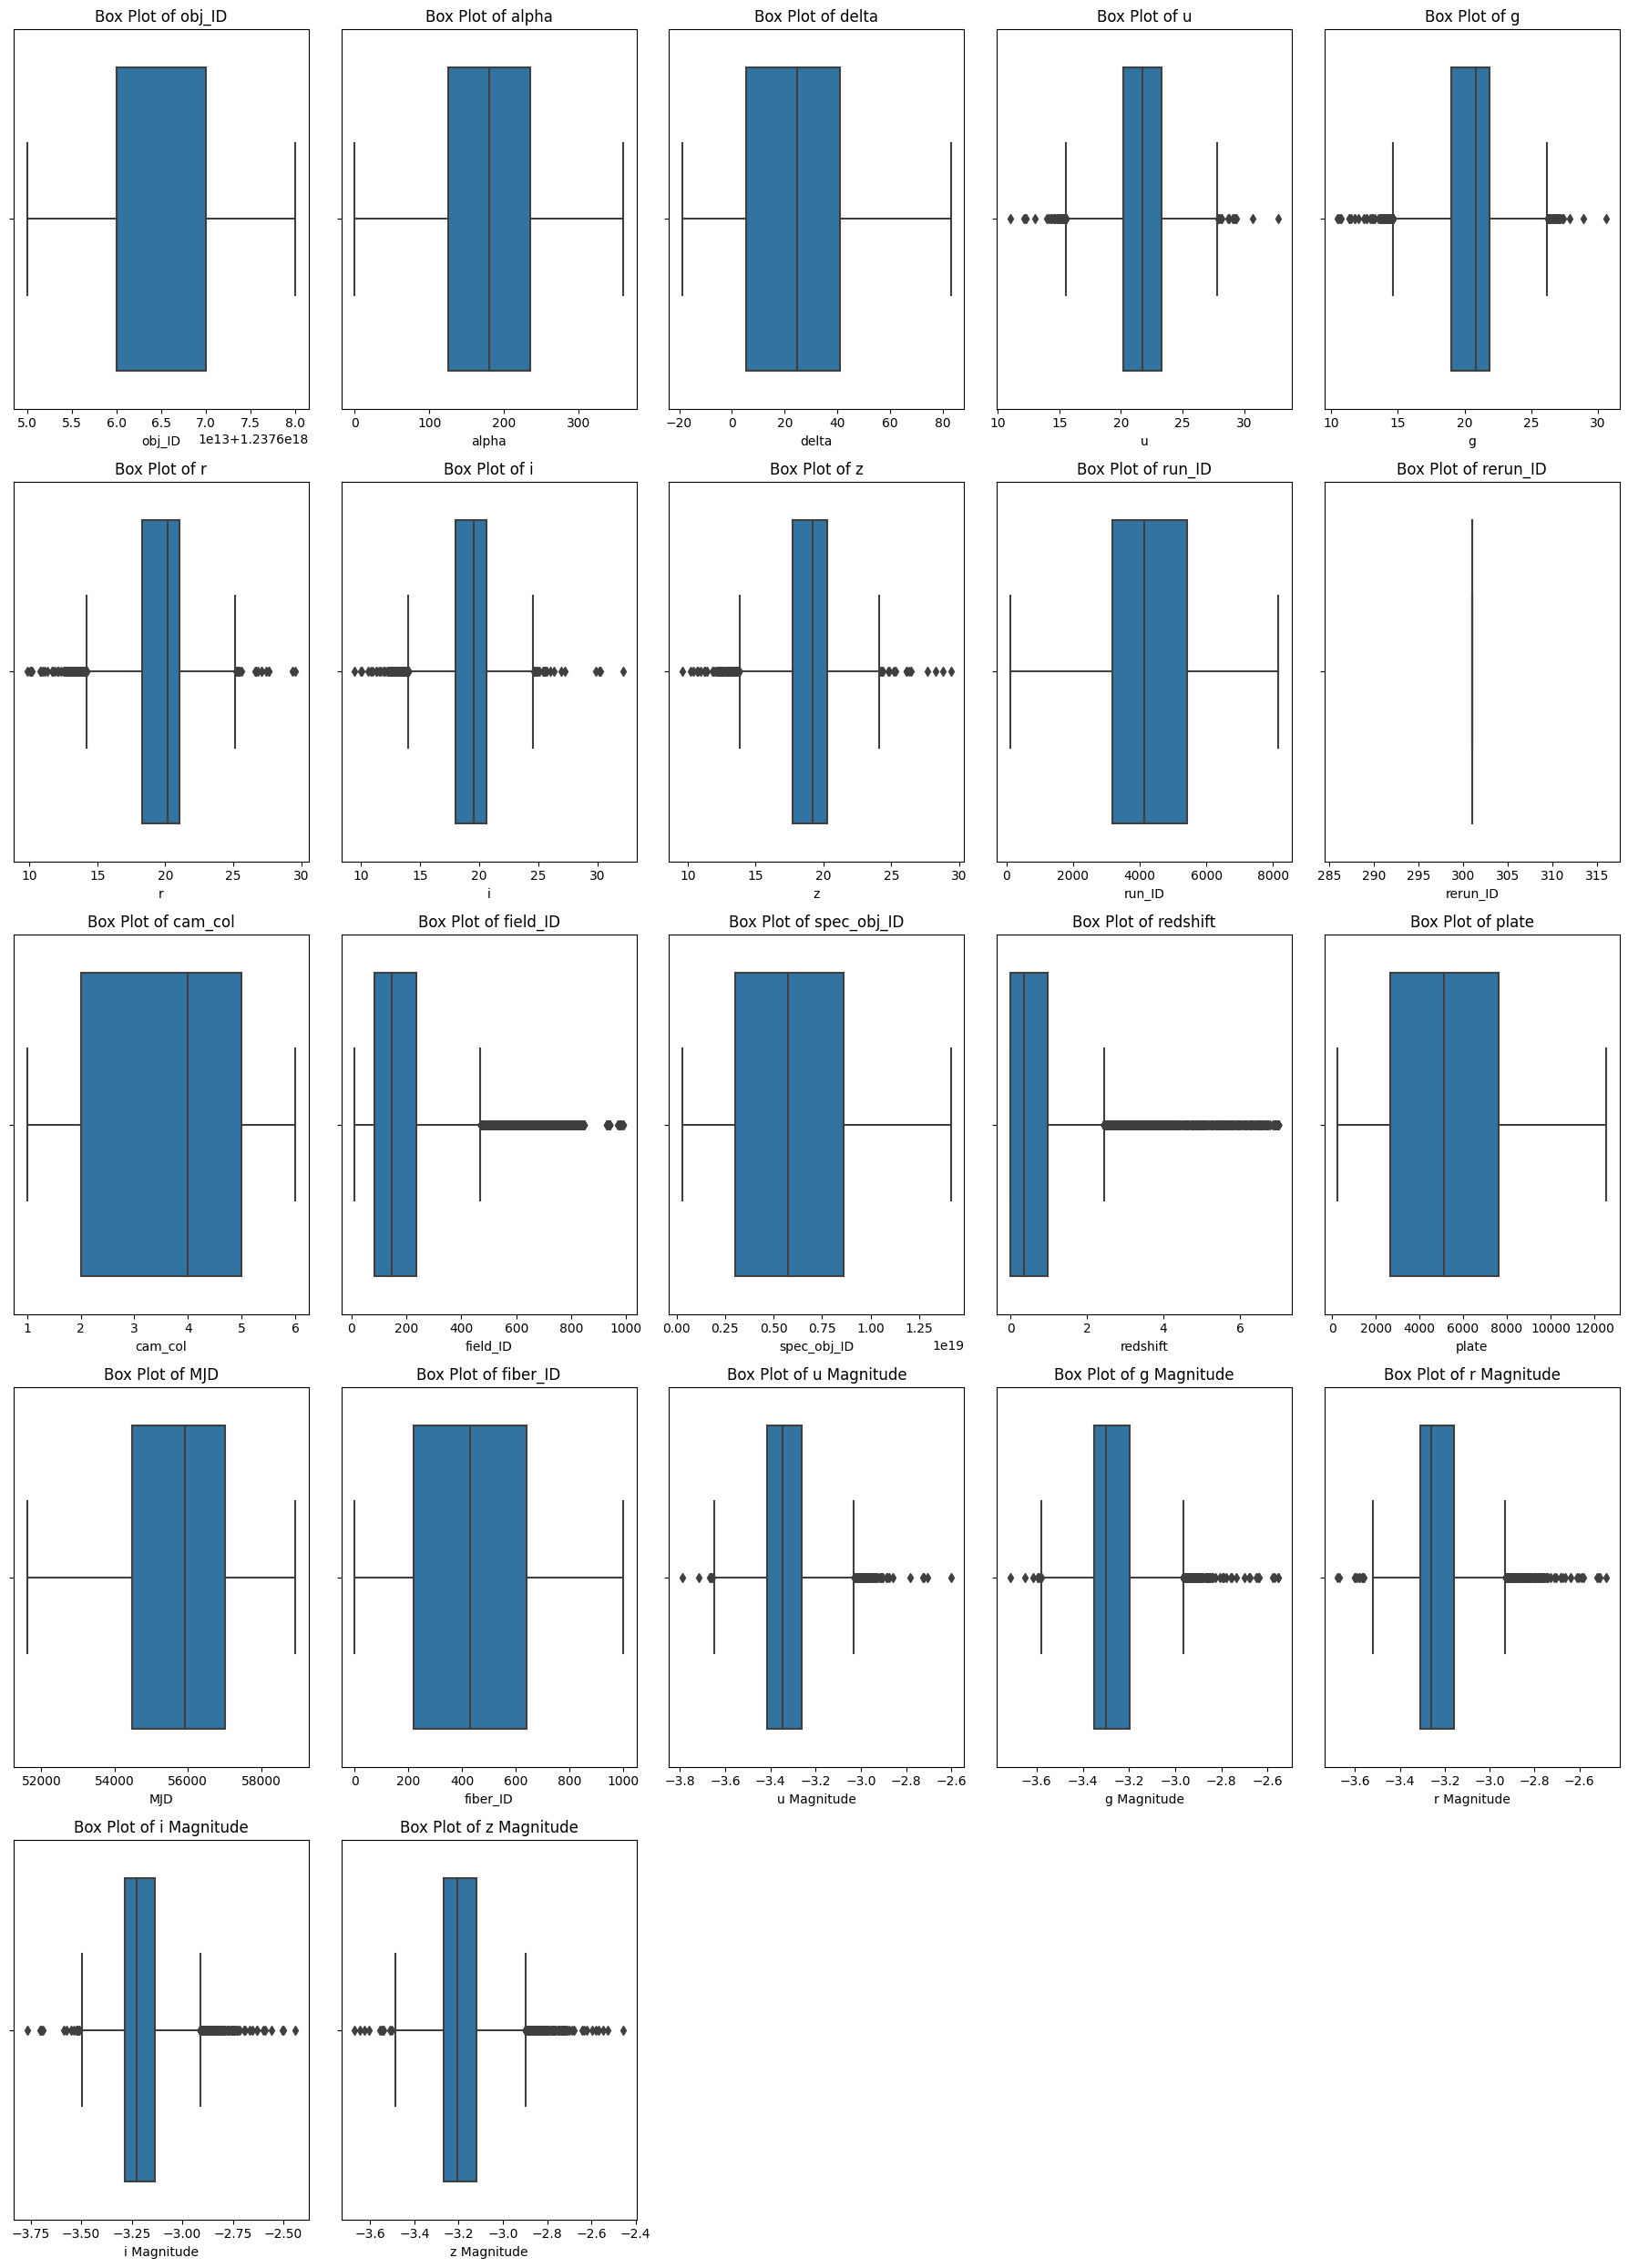

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_columns = df_balanced.select_dtypes(include='number')

# Calculate the number of rows and columns for the subplot layout
num_cols = len(numerical_columns.columns)
num_rows = (num_cols - 1) // 5 + 1

# Create box plots for each numerical feature
plt.figure(figsize=(18, 5 * num_rows))
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(x=df_balanced[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Copy the original DataFrame to keep it unchanged
df_removed_outliers = df_balanced.copy()

# Define the lower and upper bounds for outlier removal
lower_bound_factor = 1.5
upper_bound_factor = 1.5

# Iterate through each numerical column
numerical_columns = df_removed_outliers.select_dtypes(include='number')
for col in numerical_columns.columns:
    # Calculate lower and upper bounds based on the interquartile range (IQR)
    q1 = df_removed_outliers[col].quantile(0.25)
    q3 = df_removed_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - lower_bound_factor * iqr
    upper_bound = q3 + upper_bound_factor * iqr

    # Remove rows with outliers in the current column
    df_removed_outliers = df_removed_outliers[(df_removed_outliers[col] >= lower_bound) & (df_removed_outliers[col] <= upper_bound)]


# Creating Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Linear Regression

# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.10565666770176896
R-squared: 0.7730251359726144


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### KNN Regression

# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=7))
])

model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.10687930288783681
R-squared: 0.7703986339150617


In [ ]:
### Random Forest Regressor


# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.07276928582531259
R-squared: 0.8436748090315387


In [ ]:
### Gradient Boosting Regressor


# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.08387436203920794
R-squared: 0.8198185468713755


In [ ]:
### Support Vector Regressor (SVR):


# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
from sklearn.svm import SVR

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0813354335372011
R-squared: 0.8252727502269542


In [ ]:
### XGBoost Regressor:


# Step 1: Feature Selection
features = df_removed_outliers.drop(['redshift'], axis=1)
target = df_removed_outliers['redshift']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Feature Preprocessing (Scaling and One-Hot Encoding)
numerical_features = X_train.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Step 4: Model Selection and Step 5: Model Training
from xgboost import XGBRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.07731484479156767
R-squared: 0.8339099011394366


# Calculating Distance

In [ ]:
### Using the Random Forest Regressor which was the best model we will calculate the predicted distance from the object

df_removed_outliers['predicted_redshift'] = model.predict(features)


In [ ]:
H0 = 70  #Hubble constant value in km/s/Mpc

df_removed_outliers['predicted_redshift_adjusted'] = df_removed_outliers['predicted_redshift'] + 1e-5 # adjust redshift value so that there wouldnt be division by zero

# Calculate distance using Hubble Law
speed_of_light = 3e5  # in km/s
df_removed_outliers['distance'] = (speed_of_light * df_removed_outliers['predicted_redshift_adjusted']) / H0

df_removed_outliers['distance'] # distance is in mpc which is equal to 3.09 million light-years

9          0.04
12         0.04
16         0.04
18      1010.25
21         0.04
          ...  
56059   3857.19
89037   2571.47
60264    649.02
82428   1879.63
21393   3514.33
Name: distance, Length: 55582, dtype: float64

# Clustering

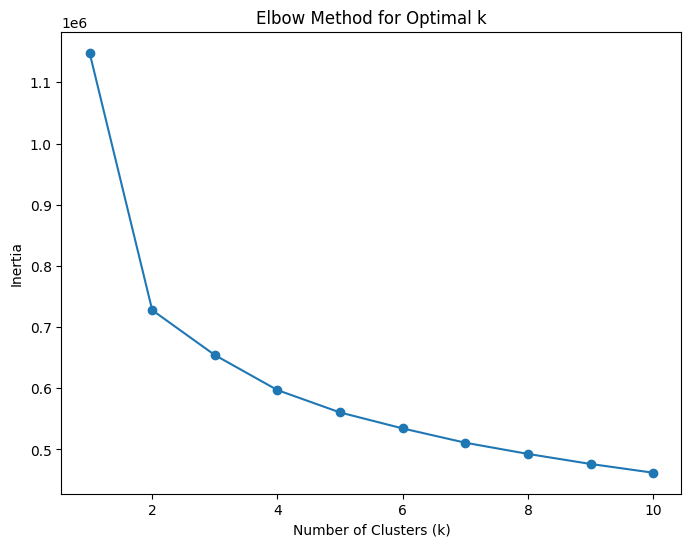

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Feature selection
features_for_clustering = df_removed_outliers.drop(['redshift'], axis=1)  # Exclude the target variable

# Separate numerical and categorical features
numerical_features = features_for_clustering.select_dtypes(include='number').columns
categorical_features = ['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Standardize and encode features
scaled_and_encoded_features = preprocessor.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(scaled_and_encoded_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
features_for_clustering

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,class,plate,MJD,fiber_ID,u Magnitude,g Magnitude,r Magnitude,i Magnitude,z Magnitude,Cluster
9,1237670000000000000.00,39.15,28.10,21.75,20.03,19.18,18.82,18.65,5934,301,...,STAR,2444,54082,232,-3.34,-3.25,-3.21,-3.19,-3.18,0
12,1237680000000000000.00,345.80,32.67,23.17,20.14,19.42,19.22,18.89,8157,301,...,STAR,6504,56540,574,-3.41,-3.26,-3.22,-3.21,-3.19,2
16,1237680000000000000.00,353.20,3.08,24.55,21.44,20.95,20.79,20.48,7712,301,...,STAR,4283,55864,178,-3.48,-3.33,-3.30,-3.29,-3.28,2
18,1237680000000000000.00,14.38,3.21,21.82,20.56,19.95,19.76,19.56,7712,301,...,STAR,8753,57373,258,-3.35,-3.28,-3.25,-3.24,-3.23,2
21,1237660000000000000.00,144.79,46.83,24.55,22.34,20.92,19.87,19.17,2821,301,...,STAR,7316,56710,756,-3.48,-3.37,-3.30,-3.25,-3.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56059,1237660000000000000.00,38.96,-0.52,22.49,22.37,22.16,21.91,21.52,2700,301,...,GALAXY,7336,56656,421,-3.38,-3.37,-3.36,-3.35,-3.33,2
89037,1237680000000000000.00,330.74,7.67,21.64,21.06,20.20,19.51,18.93,7772,301,...,GALAXY,5067,55751,301,-3.34,-3.31,-3.26,-3.23,-3.19,2
60264,1237650000000000000.00,178.06,-1.65,19.91,18.36,17.51,17.08,16.78,1140,301,...,GALAXY,330,52370,367,-3.25,-3.16,-3.11,-3.08,-3.06,1
82428,1237680000000000000.00,2.68,27.95,23.16,21.39,19.75,18.93,18.40,8103,301,...,GALAXY,7135,56564,115,-3.41,-3.33,-3.24,-3.19,-3.16,2


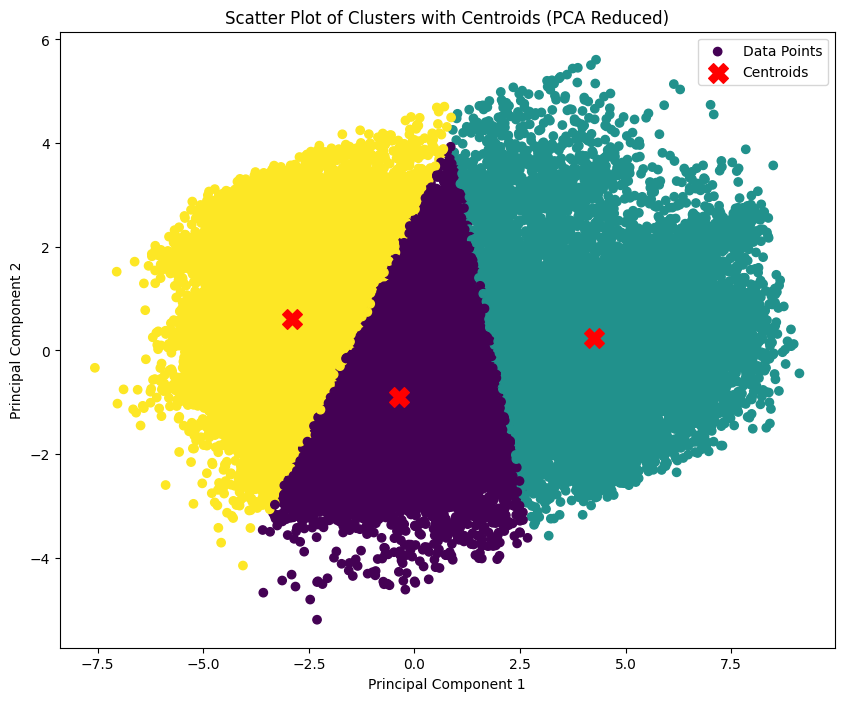

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

optimal_k = 3

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_and_encoded_features)
clusters = kmeans.fit_predict(reduced_features)

# Add a new column 'Cluster' to the original dataframe
df_removed_outliers['Cluster'] = clusters

# Plot a scatter graph to show the clustering in the reduced feature space
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df_removed_outliers['Cluster'], cmap='viridis', label='Data Points')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('Scatter Plot of Clusters with Centroids (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
pca_loadings = PCA(n_components=2).fit(scaled_and_encoded_features).components_


In [ ]:
loadings = pca.components_[:2, :22]

# Display the loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns)
print("Loadings for the first two principal components:")
print(loadings_df)


Loadings for the first two principal components:
   obj_ID  alpha  delta     u     g     r     i     z  run_ID  rerun_ID  ...  \
0   -0.06  -0.01  -0.01 -0.23 -0.29 -0.31 -0.30 -0.29   -0.07     -0.00  ...   
1    0.56   0.04  -0.18 -0.18 -0.13 -0.08 -0.05 -0.03    0.56      0.00  ...   

   spec_obj_ID  class  plate   MJD  fiber_ID  u Magnitude  g Magnitude  \
0        -0.23  -0.23  -0.23 -0.09      0.24         0.29         0.31   
1         0.26   0.26   0.26  0.07      0.18         0.13         0.09   

   r Magnitude  i Magnitude  z Magnitude  
0         0.30         0.29         0.00  
1         0.05         0.03        -0.04  

[2 rows x 22 columns]


In [ ]:
# Assuming X_train is your DataFrame and X_train.columns contains feature names
feature_names = X_train.columns

# Display the loadings
loadings_df = pd.DataFrame(loadings, columns=feature_names)
print("Loadings for the first two principal components:")
print(loadings_df)

# Sort features based on absolute loading values for the first component
sorted_indices_pc1 = np.argsort(np.abs(loadings[0, :]))[::-1]
# Sort features based on absolute loading values for the second component
sorted_indices_pc2 = np.argsort(np.abs(loadings[1, :]))[::-1]

# Display the most important features for the first component with names
most_important_features_pc1 = feature_names[sorted_indices_pc1[:k]]
print("\nMost important features for the first component:", most_important_features_pc1)

# Display the most important features for the second component with names
most_important_features_pc2 = feature_names[sorted_indices_pc2[:k]]
print("\nMost important features for the second component:", most_important_features_pc2)


Loadings for the first two principal components:
   obj_ID  alpha  delta     u     g     r     i     z  run_ID  rerun_ID  ...  \
0   -0.06  -0.01  -0.01 -0.23 -0.29 -0.31 -0.30 -0.29   -0.07     -0.00  ...   
1    0.56   0.04  -0.18 -0.18 -0.13 -0.08 -0.05 -0.03    0.56      0.00  ...   

   spec_obj_ID  class  plate   MJD  fiber_ID  u Magnitude  g Magnitude  \
0        -0.23  -0.23  -0.23 -0.09      0.24         0.29         0.31   
1         0.26   0.26   0.26  0.07      0.18         0.13         0.09   

   r Magnitude  i Magnitude  z Magnitude  
0         0.30         0.29         0.00  
1         0.05         0.03        -0.04  

[2 rows x 22 columns]

Most important features for the first component: Index(['g Magnitude', 'r', 'r Magnitude', 'i', 'u Magnitude', 'g',
       'i Magnitude', 'z', 'fiber_ID', 'plate'],
      dtype='object')

Most important features for the second component: Index(['obj_ID', 'run_ID', 'plate', 'spec_obj_ID', 'class', 'fiber_ID', 'u',
       'delta', 'u 